# Lab4  PYMCDM


Raport


W ramach laboratorium 4 dokonałem wielokryterialnej analizy mieszkań 3-pokojowych, z osiedla Pogodno w Szczecinie. Oto wykorzystane alternatywy i kryteria:
 

| Nr  | Cena (zł) | Czynsz (zł) | Metraż (m²) |     Stan     | Piętro |Przestrzenie dodatkowe| Odległość od miasta(km) |Zbior.kom.(m)|
|:---:|:---------:|:-----------:|:-----------:|:------------:|:------:|:--------------------:|:-----------------------:|:----------:|
| 1   | 699 000   | 670         | 69          |      3       | 0      |         2            |  4,6                    |  550       |
| 2   | 774 000   | 425         | 73          |      4       | 4      |         2            |  4,8                    |  800       |
| 3   | 495 000   | 600         | 55          |      2       | 0      |         2            |  4,3                    |  500       |
| 4   | 935 000   | 550         | 73          |      4       | 0      |         1            |  3,6                    |  160       |
| 5   | 930 000   | 380         |136          |      4       | 2      |         4            |  3,1                    |  400       |
| 6   | 419 000   | 300         | 54          |      1       | 2      |         1            |  3,9                    |  220       |
| 7   | 435 000   | 420         | 56          |      1       | 2      |         2            |  3,8                    |  120       |
| 8   | 500 000   | 225         | 47          |      4       | 1      |         1            |  4,0                    |  400       |
| 9   | 629 000   | 800         | 63          |      3       | 5      |         3            |  4,3                    |  650       |
| 10  | 580 000   | 280         | 48          |      4       | 2      |         3            |  4,5                    |  500       |
                  
                  

Stan: 1 - do remontu generalnego, 2 - do remontu, 3 - do odświezenia, 4 - pod klucz 


Odległość od miasta odnosi się do odległości jaką nalezy pokonać autem, aby dojechać do Placu Grunwaldzkiego lub Bramy Portowej (w zaleności, która lokalizacja jest blizej)

Zbior.kom. odnosi się do odległości do najbliszego przystanku komunikacji zbiorowej, pozwalającej dojechać bezpośrednio do Placu Grunwaldzkiego lub Bramy Portowej. 

Przestrzenie dodatkowe konkretnych alternatyw

| Nr | Przestrzenie dodatkowe           |
|----|----------------------------------|
| 1  |  Balkon, garaż                   |
| 2  |  Balkon, garaż                   |
| 3  |  Balkon, piwnica                 |
| 4  |  Piwnica                         |
| 5  |  Balkon, piwnica, ogród, kom. lokatorska                   |
| 6  |  Piwnica                         |
| 7  |  Piwnica, strych                 |
| 8  |  Piwnica                         |
| 9  |  Balkon, piwnica, kom. lokatorska|
| 10 |  Ogródek, piwnica, strych        |


In [83]:
import numpy as np
from pymcdm.methods import SPOTIS, TOPSIS, COMET
from pymcdm.methods.comet_tools import MethodExpert
from pymcdm.correlations import rw, ws
import matplotlib.pyplot as plt
from pymcdm import visuals
import pandas as pd
from IPython.display import display
from itertools import product


mieszkania = np.array([
    [699000, 670, 69, 3, 0, 2, 4.6, 550],  # mieszkanie nr 1
    [674000, 425, 73, 4, 4, 2, 4.8, 800],  # mieszkanie nr 2
    [495000, 600, 55, 2, 0, 2, 4.3, 500],  # mieszkanie nr 3
    [735000, 550, 73, 4, 0, 1, 3.6, 160],  # mieszkanie nr 4
    [400000, 380, 73, 1, 2, 4, 3.1, 400],  # mieszkanie nr 5
    [399000, 300, 54, 1, 2, 1, 3.9, 220],  # mieszkanie nr 6
    [435000, 420, 56, 1, 2, 2, 3.8, 120],  # mieszkanie nr 7
    [500000, 225, 47, 4, 1, 1, 4.0, 400],  # mieszkanie nr 8
    [629000, 800, 63, 2, 5, 3, 4.3, 650],  # mieszkanie nr 9
    [580000, 280, 48, 4, 2, 3, 4.5, 500]]) # mieszkanie nr 10

bounds = np.array([[399000, 935000], [225, 800], [47, 73], [1, 4], [0, 5], [0, 4], [3.0, 4.8], [120, 800]], dtype=float)
weights = np.array([0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
types = np.array([-1, -1, 1, 1, 1, 1, -1, -1])
esp = np.array([550000, 550, 60, 3, 1, 3, 4.0, 500])
body_spotis = SPOTIS(bounds, esp)
pref_spotis = body_spotis(mieszkania, weights, types)
ranking_spotis = body_spotis.rank(pref_spotis)

body_topsis = TOPSIS()
pref_topsis = body_topsis(mieszkania, weights, types)
ranking_topsis = body_topsis.rank(pref_topsis[::-1])


print("Ranking SPOTIS: ")
for i, rank in enumerate(ranking_spotis, start=1):  
    print(f"Mieszkanie nr {i}. miejsce:{rank} (wynik:{pref_spotis[i-1]:.3})")

print("Ranking TOPSIS: ")
for i, rank in enumerate(ranking_topsis, start=1):  
    print(f"Mieszkanie nr {i}. miejsce:{rank} (wynik: {pref_topsis[i-1]:.3})")


Ranking SPOTIS: 
Mieszkanie nr 1. miejsce:2.0 (wynik:0.218)
Mieszkanie nr 2. miejsce:9.0 (wynik:0.347)
Mieszkanie nr 3. miejsce:1.0 (wynik:0.152)
Mieszkanie nr 4. miejsce:7.0 (wynik:0.295)
Mieszkanie nr 5. miejsce:8.0 (wynik:0.341)
Mieszkanie nr 6. miejsce:10.0 (wynik:0.35)
Mieszkanie nr 7. miejsce:6.0 (wynik:0.282)
Mieszkanie nr 8. miejsce:4.0 (wynik:0.28)
Mieszkanie nr 9. miejsce:5.0 (wynik:0.28)
Mieszkanie nr 10. miejsce:3.0 (wynik:0.232)
Ranking TOPSIS: 
Mieszkanie nr 1. miejsce:5.0 (wynik: 0.309)
Mieszkanie nr 2. miejsce:9.0 (wynik: 0.474)
Mieszkanie nr 3. miejsce:4.0 (wynik: 0.436)
Mieszkanie nr 4. miejsce:3.0 (wynik: 0.428)
Mieszkanie nr 5. miejsce:2.0 (wynik: 0.697)
Mieszkanie nr 6. miejsce:1.0 (wynik: 0.616)
Mieszkanie nr 7. miejsce:8.0 (wynik: 0.602)
Mieszkanie nr 8. miejsce:7.0 (wynik: 0.597)
Mieszkanie nr 9. miejsce:6.0 (wynik: 0.362)
Mieszkanie nr 10. miejsce:10.0 (wynik: 0.563)


In [81]:
cvalues = COMET.make_cvalues(mieszkania, numbers_of_cvalues=2)

expert = MethodExpert(TOPSIS(), weights, types)
comet = COMET(cvalues, expert)
pref_comet = comet(mieszkania)
ranking_comet = comet.rank(pref_comet)

print("Ranking COMET: ")
for i, rank in enumerate(ranking_comet, start=1):  
    print(f"Mieszkanie nr {i}. miejsce:{rank} (wynik: {pref_comet[i-1]:.3})")

Ranking COMET: 
Mieszkanie nr 1. miejsce:10.0 (wynik: 0.245)
Mieszkanie nr 2. miejsce:6.0 (wynik: 0.438)
Mieszkanie nr 3. miejsce:7.0 (wynik: 0.404)
Mieszkanie nr 4. miejsce:8.0 (wynik: 0.359)
Mieszkanie nr 5. miejsce:1.0 (wynik: 0.775)
Mieszkanie nr 6. miejsce:2.0 (wynik: 0.658)
Mieszkanie nr 7. miejsce:4.0 (wynik: 0.616)
Mieszkanie nr 8. miejsce:3.0 (wynik: 0.642)
Mieszkanie nr 9. miejsce:9.0 (wynik: 0.293)
Mieszkanie nr 10. miejsce:5.0 (wynik: 0.571)


/Users/filip/Desktop/4semestr/Programowanie /python.intro/.venv/lib/python3.13/site-packages/pymcdm/validators.py:520: UserWarning: Alternatives with indices [0] are dominant. Consider removing them, as such alternatives can cause numerical errors in some methods.
  warn(f'Alternatives with indices {dominant_alts} are dominant. Consider removing them, '
/Users/filip/Desktop/4semestr/Programowanie /python.intro/.venv/lib/python3.13/site-packages/pymcdm/validators.py:525: UserWarning: Alternatives with indices [0] are dominated. Consider removing them, as such alternatives can cause numerical errors in some methods.
  warn(f'Alternatives with indices {dominated_alts} are dominated. Consider removing them, '


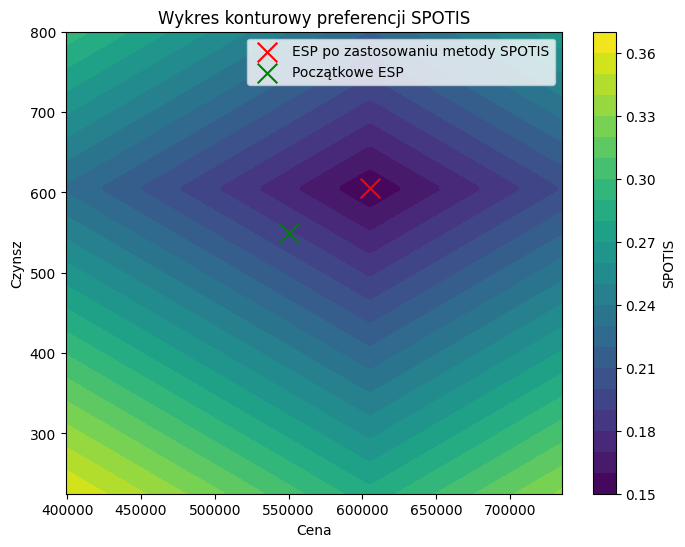

Odległość : 55112.10

Rankingi dla kolejnych wartości esp: 
1. 7.0
2. 10.0
3. 1.0
4. 8.0
5. 6.0
6. 5.0
7. 2.0
8. 3.0
9. 9.0
10. 4.0
1. 7.0
2. 10.0
3. 1.0
4. 8.0
5. 6.0
6. 5.0
7. 2.0
8. 3.0
9. 9.0
10. 4.0
1. 6.0
2. 10.0
3. 1.0
4. 8.0
5. 7.0
6. 5.0
7. 2.0
8. 3.0
9. 9.0
10. 4.0
1. 5.0
2. 10.0
3. 1.0
4. 8.0
5. 7.0
6. 6.0
7. 2.0
8. 3.0
9. 9.0
10. 4.0
1. 5.0
2. 10.0
3. 1.0
4. 8.0
5. 7.0
6. 6.0
7. 2.0
8. 4.0
9. 9.0
10. 3.0
1. 5.0
2. 10.0
3. 1.0
4. 7.0
5. 8.0
6. 6.0
7. 2.0
8. 4.0
9. 9.0
10. 3.0
1. 4.0
2. 10.0
3. 1.0
4. 6.0
5. 9.0
6. 7.0
7. 2.0
8. 5.0
9. 8.0
10. 3.0
1. 3.0
2. 10.0
3. 1.0
4. 6.0
5. 9.0
6. 8.0
7. 4.0
8. 5.0
9. 7.0
10. 2.0
1. 2.0
2. 10.0
3. 1.0
4. 7.0
5. 9.0
6. 8.0
7. 4.0
8. 5.0
9. 6.0
10. 3.0
1. 2.0
2. 10.0
3. 1.0
4. 7.0
5. 8.0
6. 9.0
7. 4.0
8. 5.0
9. 6.0
10. 3.0
1. 2.0
2. 9.0
3. 1.0
4. 7.0
5. 8.0
6. 10.0
7. 6.0
8. 4.0
9. 5.0
10. 3.0
1. 2.0
2. 8.0
3. 1.0
4. 7.0
5. 9.0
6. 10.0
7. 6.0
8. 5.0
9. 4.0
10. 3.0
1. 2.0
2. 8.0
3. 1.0
4. 5.0
5. 9.0
6. 10.0
7. 7.0
8. 6.0
9. 4.0
10. 3.0
1. 2

,Ranking zmodyfikowany,WS,RW
Zmiana,,,
-10.0%,"7.0, 10.0, 1.0, 8.0, 6.0, 5.0, 2.0, 3.0, 9.0, 4.0",0.775,0.491
-9.0%,"7.0, 10.0, 1.0, 8.0, 6.0, 5.0, 2.0, 3.0, 9.0, 4.0",0.775,0.491
-8.0%,"6.0, 10.0, 1.0, 8.0, 7.0, 5.0, 2.0, 3.0, 9.0, 4.0",0.807,0.560
-7.0%,"5.0, 10.0, 1.0, 8.0, 7.0, 6.0, 2.0, 3.0, 9.0, 4.0",0.838,0.653
-6.0%,"5.0, 10.0, 1.0, 8.0, 7.0, 6.0, 2.0, 4.0, 9.0, 3.0",0.866,0.669
-5.0%,"5.0, 10.0, 1.0, 7.0, 8.0, 6.0, 2.0, 4.0, 9.0, 3.0",0.868,0.677
-4.0%,"4.0, 10.0, 1.0, 6.0, 9.0, 7.0, 2.0, 5.0, 8.0, 3.0",0.893,0.755
-3.0%,"3.0, 10.0, 1.0, 6.0, 9.0, 8.0, 4.0, 5.0, 7.0, 2.0",0.919,0.907
-2.0%,"2.0, 10.0, 1.0, 7.0, 9.0, 8.0, 4.0, 5.0, 6.0, 3.0",0.976,0.947


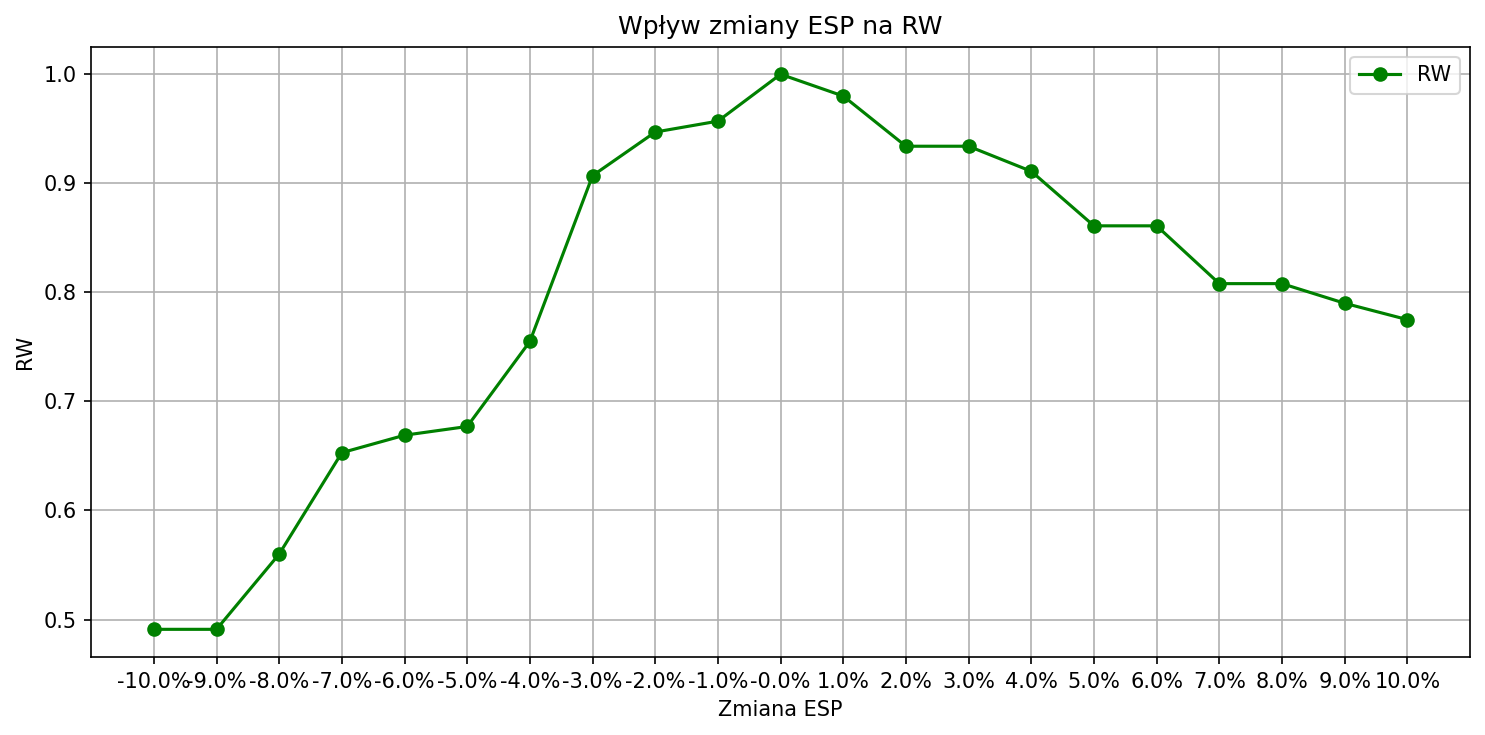

/var/folders/s2/q8sdlkvn50d02jjxfnhb4ckh0000gn/T/ipykernel_54105/815159049.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


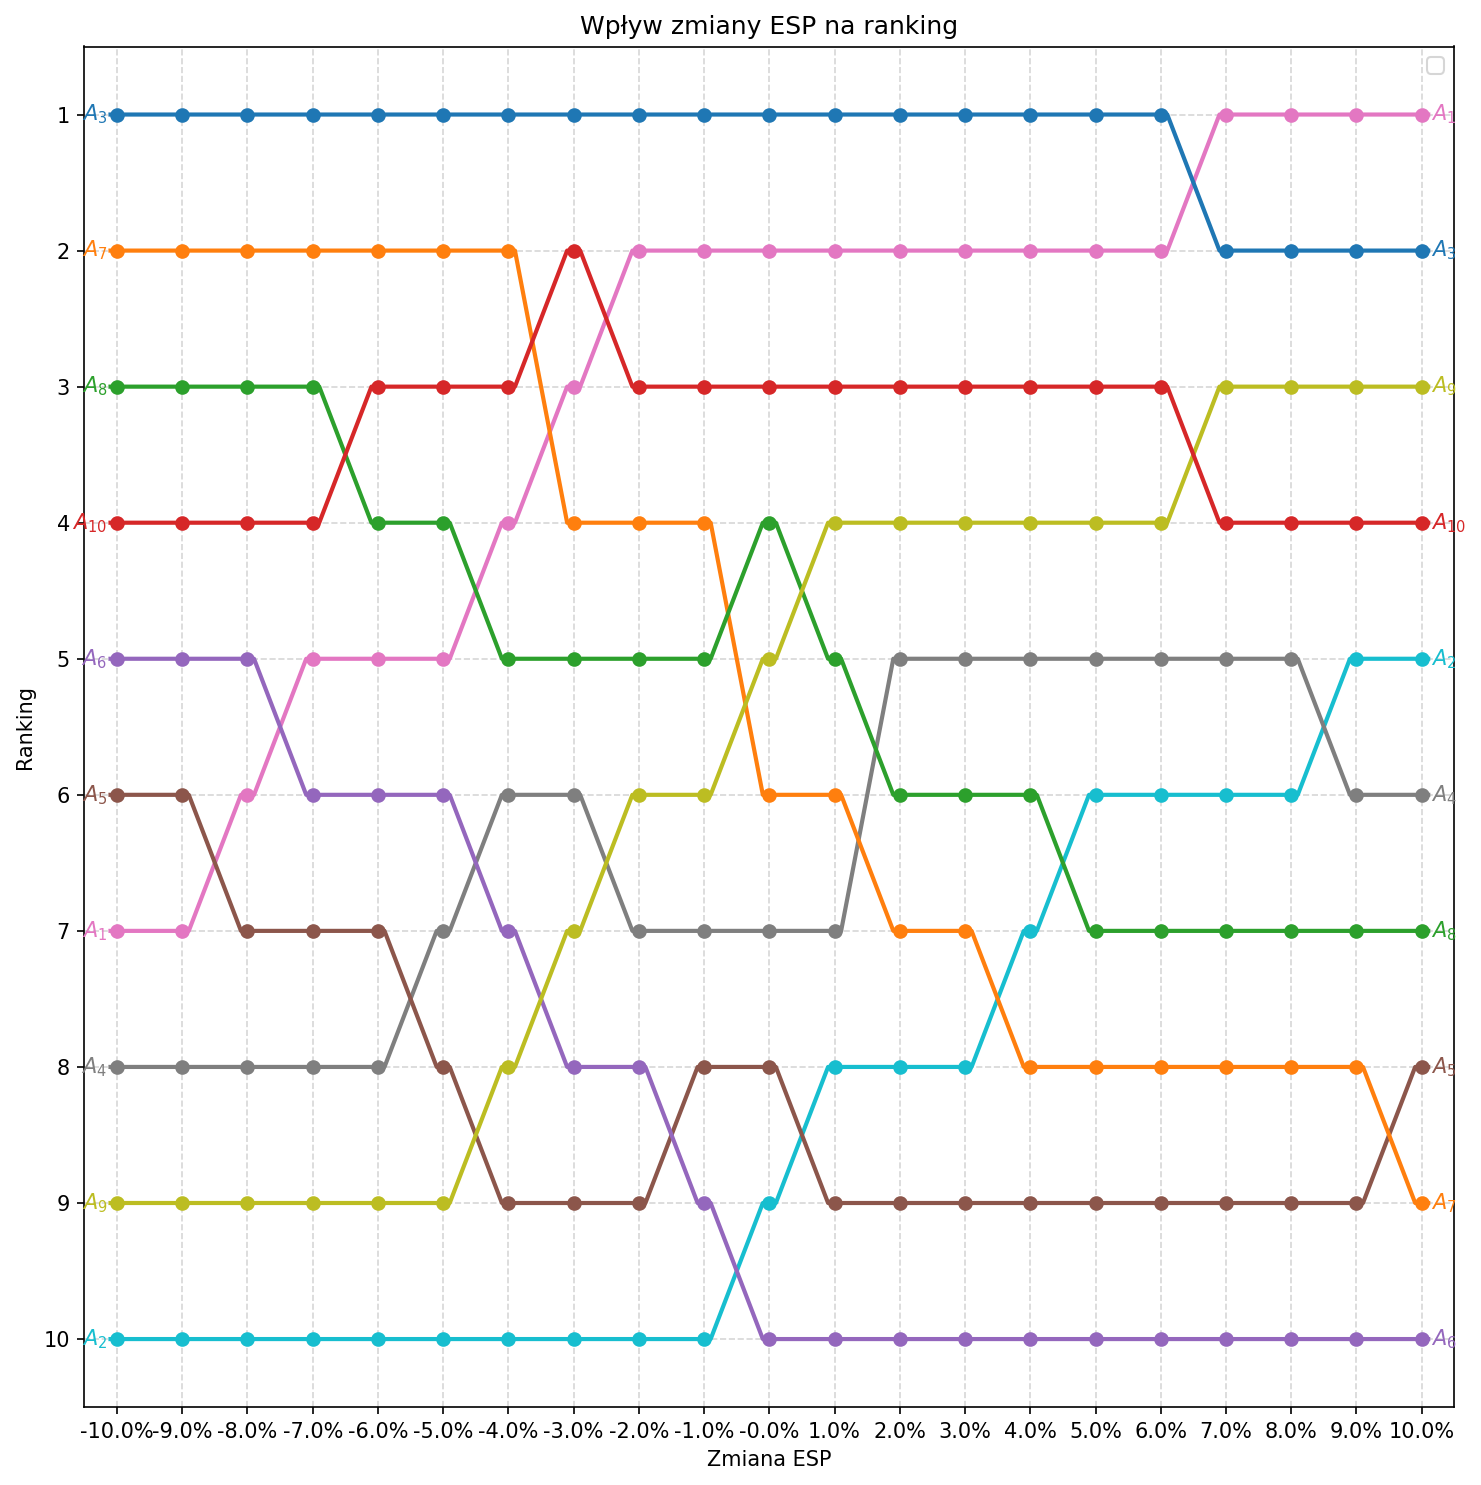

In [82]:
changes = np.arange(-0.1, 0.11, 0.01) 
results = [] 
for change in changes: 
    esp_mod = esp * (1 + change) 
    body_spotis.esp = esp_mod 
    pref = body_spotis(mieszkania, weights, types)
    
    ranking2 = body_spotis.rank(pref)

    ws_value = ws(ranking_spotis, ranking2)
    rw_value = rw(ranking_spotis, ranking2)
    
    results.append({
        "Zmiana": f"{change *100:.1f}%",
        "Ranking zmodyfikowany": ranking2,
        "WS": round(ws_value, 3),
        "RW": round(rw_value, 3)
    })

ceny = mieszkania[:, 0]
czynsze = mieszkania[:, 1]
c1 = np.linspace(np.min(ceny), np.max(ceny), 100)
c2 = np.linspace(np.min(czynsze), np.max(czynsze), 100)
z = [body_spotis([np.hstack([p, bounds.mean(axis=1)[2:]])], weights, types) for p in product(c1, c2)]
z = np.array(z).reshape(len(c1), len(c2))


plt.figure(figsize=(8, 6))
contour = plt.contourf(c1, c2, z.T, levels=20, cmap="viridis")
plt.scatter(body_spotis.esp[0], body_spotis.esp[1], color="red", marker="x", s=200, label="ESP po zastosowaniu metody SPOTIS")
plt.scatter(esp[0], esp[1], color="green", marker="x", s=200, label="Początkowe ESP")
plt.colorbar(contour, label="SPOTIS")
plt.xlabel("Cena")
plt.ylabel("Czynsz")
plt.title("Wykres konturowy preferencji SPOTIS")
plt.legend()    
plt.show()
distance = sum(abs(body_spotis.esp - esp))
print(f"Odległość : {distance:.2f}")

print("\nRankingi dla kolejnych wartości esp: ")
for result in results:
    for i, rank in enumerate(result["Ranking zmodyfikowany"], start=1):
        print(f"{i}. {rank}")
      
ranking_df = pd.DataFrame(results)
ranking_df["Ranking zmodyfikowany"] = ranking_df["Ranking zmodyfikowany"].apply(lambda x: ", ".join(map(str, x)))
ranking_df.set_index("Zmiana", inplace=True)
display(ranking_df)

zmiany = [r["Zmiana"] for r in results]
rw_values = [r["RW"] for r in results]
fig, ax = plt.subplots(figsize=(10, 5), dpi=150, tight_layout=True)

ax.plot(zmiany, rw_values, marker='o', color='green', label='RW')
ax.set_xlabel("Zmiana ESP")
ax.set_ylabel("RW")
ax.set_title("Wpływ zmiany ESP na RW")
ax.legend()
ax.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10), dpi=150, tight_layout=True)
rankings_list = [r["Ranking zmodyfikowany"] for r in results]
visuals.ranking_flows(rankings_list, ax=ax)
ax.invert_yaxis()
ax.set_xlabel("Zmiana ESP")
ax.set_xticks(range(len(zmiany)), labels=zmiany)
ax.set_ylabel("Ranking")
ax.set_title("Wpływ zmiany ESP na ranking")
ax.set_xlabel("Zmiana ESP")
ax.set_ylabel("Ranking")
ax.set_title("Wpływ zmiany ESP na ranking")
ax.legend()
ax.grid(True)
plt.show()